# Walmart Sales Forcast

## Problem Statement:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

- You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:
    - If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
    - If the weekly sales show a seasonal trend, when and what could be the reason?
    - Does temperature affect the weekly sales in any manner?
    - How is the Consumer Price index affecting the weekly sales of various stores?
    - Top performing stores according to the historical data.
    - The worst performing store, and how significant is the difference between the highest and lowest performing stores.
- Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.


## Data Set Information:
- The walmart.csv contains 6435 rows and 8 columns.

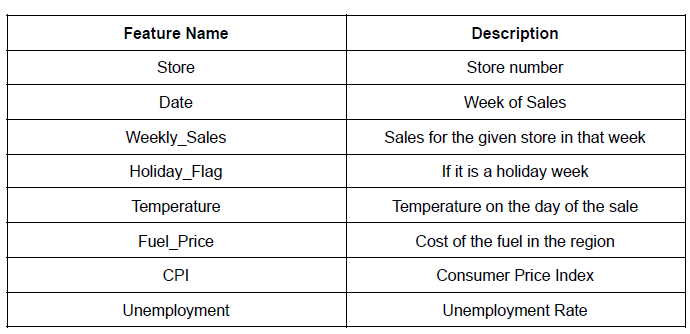

In [1]:
# Classing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# ml Libraries
!pip install pmdarima
import itertools
from sklearn.metrics import *
# from pmdarima.arima import autoarima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_csv("Walmart DataSet.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


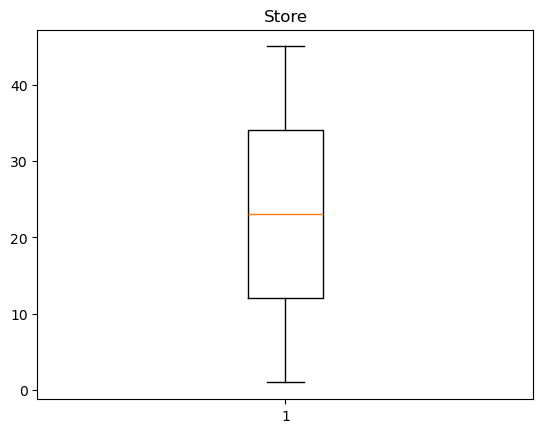

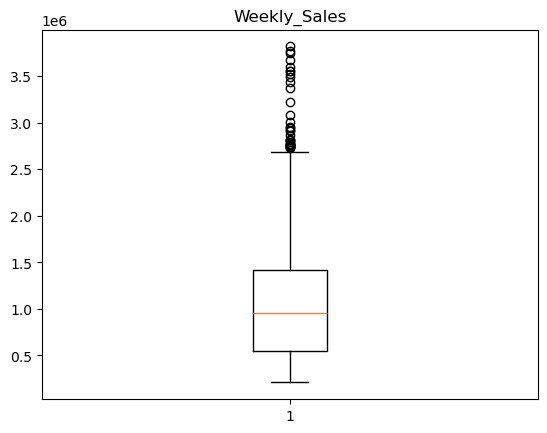

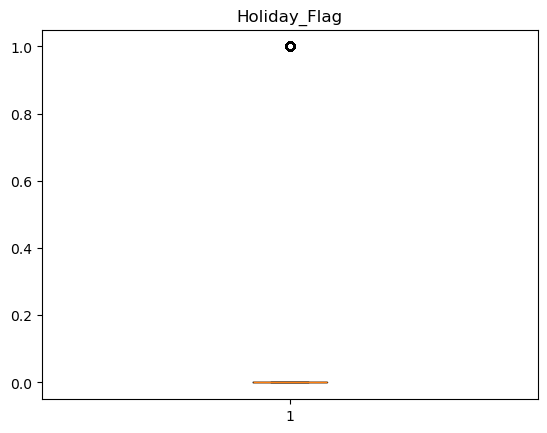

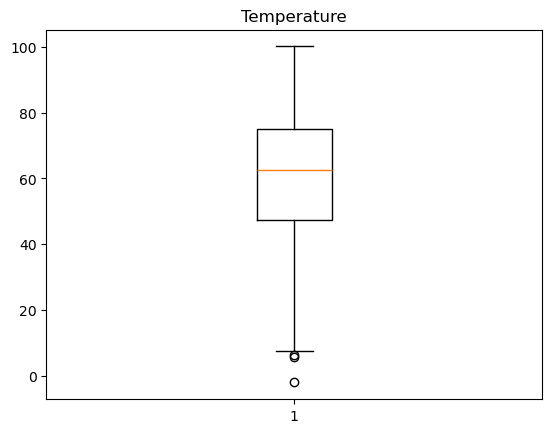

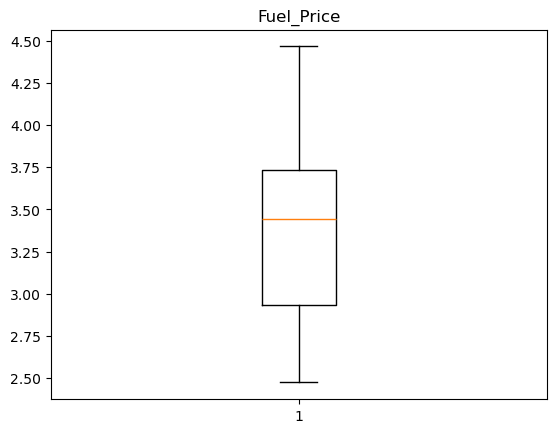

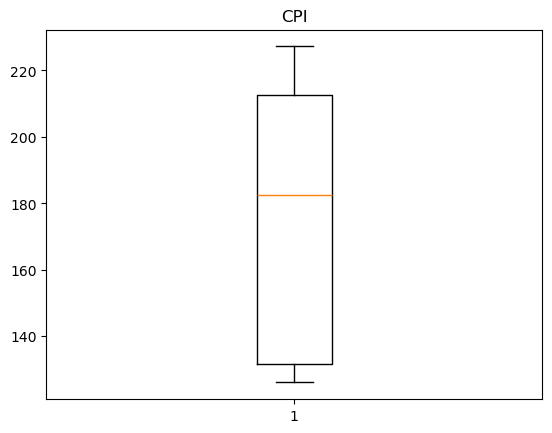

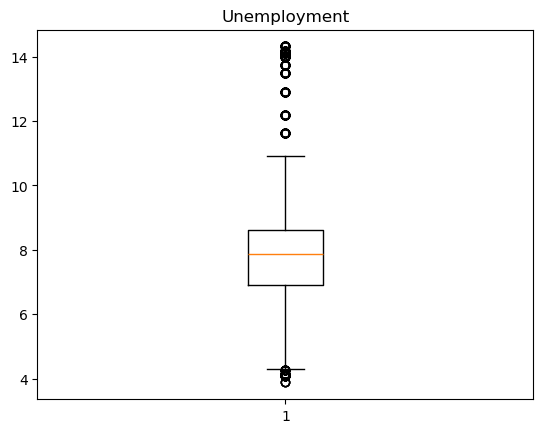

In [9]:
plt.style.use("default")
for i in df.columns:
    if df[i].dtype != 'datetime64[ns]':
        plt.boxplot(df[i])
        plt.title(i)
        plt.show()

In [10]:
df.shape

(6435, 8)

In [11]:
out_col = ['Weekly_Sales','Unemployment']
for col in out_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - IQR * 1.5
    UL = Q3 + IQR * 1.5
    df = df[(df[col] <= UL) & (df[col] >=LL)]

In [12]:
df.shape

(5920, 8)

In [13]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.003238,-0.319128,0.004353,-0.026186,0.047717,-0.208596,0.309445
Date,-0.003238,1.000000,-0.009495,0.059185,0.109813,0.757154,0.085599,-0.237068
Weekly_Sales,-0.319128,-0.009495,1.000000,0.024442,-0.040918,0.019767,-0.082957,-0.073227
Holiday_Flag,0.004353,0.059185,0.024442,1.000000,-0.156403,-0.076429,-0.000364,0.011014
Temperature,-0.026186,0.109813,-0.040918,-0.156403,1.000000,0.145789,0.218164,0.023905
Fuel_Price,0.047717,0.757154,0.019767,-0.076429,0.145789,1.000000,-0.144272,-0.105187
CPI,-0.208596,0.085599,-0.082957,-0.000364,0.218164,-0.144272,1.000000,-0.218764
Unemployment,0.309445,-0.237068,-0.073227,0.011014,0.023905,-0.105187,-0.218764,1.000000


<Axes: >

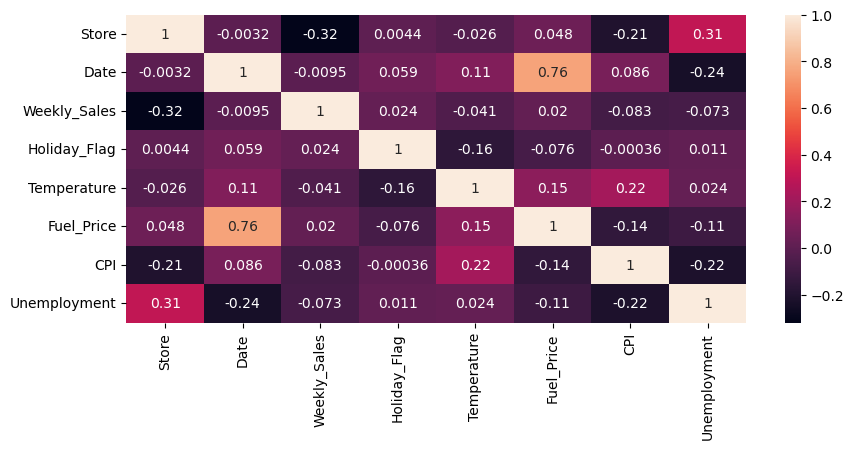

In [14]:
plt.figure(figsize = (10,4))
sns.heatmap(df.corr(),annot = True)

In [15]:
# Calculate store-wise correlation between Weekly Sales and Unemployment
store_correlation = df.groupby("Store")[["Weekly_Sales", "Unemployment"]].corr().iloc[0::2, -1].reset_index()
store_correlation.index = store_correlation.index + 1 
store_correlation

,Store,level_1,Unemployment
1,1,Weekly_Sales,-0.097955
2,2,Weekly_Sales,0.054288
3,3,Weekly_Sales,-0.230413
4,4,Weekly_Sales,-0.633422
5,5,Weekly_Sales,-0.207043
6,6,Weekly_Sales,0.016833
7,7,Weekly_Sales,-0.165382
8,8,Weekly_Sales,-0.052580
9,9,Weekly_Sales,-0.191534
10,10,Weekly_Sales,0.186979


In [16]:
# Rename columns for clarity
store_correlation = store_correlation[["Store", "Unemployment"]]
store_correlation.columns = ["Store", "Correlation"]
store_correlation

,Store,Correlation
1,1,-0.097955
2,2,0.054288
3,3,-0.230413
4,4,-0.633422
5,5,-0.207043
6,6,0.016833
7,7,-0.165382
8,8,-0.052580
9,9,-0.191534
10,10,0.186979


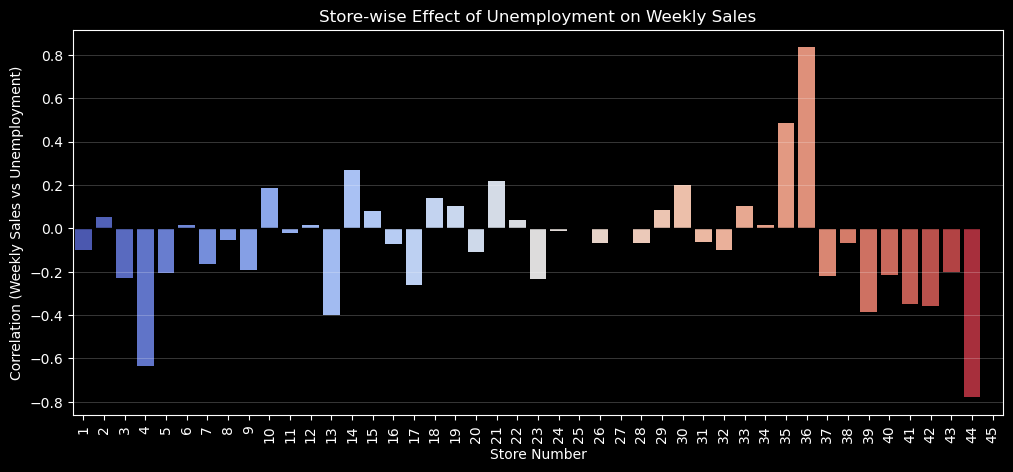

In [17]:
# Plot the correlation values for each store
plt.style.use('dark_background')

plt.figure(figsize=(12, 5))
sns.barplot(x=store_correlation["Store"], y=store_correlation["Correlation"], palette="coolwarm", hue = store_correlation["Store"], legend = False )

plt.axhline(0, color="black", linewidth=1)  # Reference line at 0 correlation
plt.xlabel("Store Number")
plt.ylabel("Correlation (Weekly Sales vs Unemployment)")
plt.title("Store-wise Effect of Unemployment on Weekly Sales")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="-", linewidth=0.5, alpha=0.3)
plt.show()


**If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**
- the overall correlation between weekly sales and unemployment rate is -0.073, which means very little negative relation.
- according to the storwise correlation **the store suffering the most from relation between unemployment and weekly sales** are **36** and **44**
- corr of store 36 is 0.833734
- corr of store 44 is -0.780076

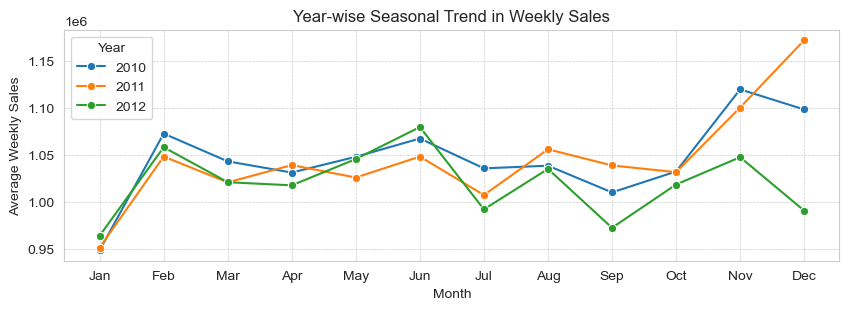

In [18]:
df_copy = df
df_copy["Year"] = df_copy["Date"].dt.year
df_copy["Month"] = df["Date"].dt.month

# Group by Year and Month to calculate average weekly sales
seasonal_trend = df_copy.groupby(["Year", "Month"])["Weekly_Sales"].mean().reset_index()

# Set background to white
sns.set_style("whitegrid")

# Plot the seasonal trend for each year
plt.figure(figsize=(10, 3))
sns.lineplot(data=seasonal_trend, x="Month", y="Weekly_Sales", hue="Year", marker="o", palette="tab10")

plt.title("Year-wise Seasonal Trend in Weekly Sales")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.legend(title="Year")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


**If the weekly sales show a seasonal trend, when and what could be the reason?**

---

### **Possible Seasonal Trends & Reasons:**
| **Season/Month** | **Trend in Sales** | **Possible Reasons** |
|-----------------|----------------|------------------|
| **January** | 📉 **Drop in sales** | Post-holiday spending decline, New Year's resolutions (less impulse shopping) |
| **February - March** | 📈 **Gradual increase** | Valentine's Day sales, spring fashion, Easter preparation |
| **April - June** | 📉 **Fluctuations** | No major holidays, school term ongoing, tax refund spending in April |
| **July - August** | 📈 **Slight boost** | Back-to-school sales, summer vacations |
| **September - October** | 📉 **Moderate sales** | Pre-holiday lull, regular spending patterns |
| **November - December** | 🚀 **Sharp Increase** | Holiday season, Black Friday, Cyber Monday, Christmas & New Year shopping |

---

### **Key Observations:**
1. **Biggest Sales Spikes** → Likely in **November & December** due to holiday shopping.
2. **Lowest Sales Periods** → **January** (post-holiday slump) and **September-October** (no major events).
3. **Midsummer Boost** → Possible rise in **June-August** due to **back-to-school shopping and summer holidays**.

To confirm these trends see a **plot of month-wise sales trend**

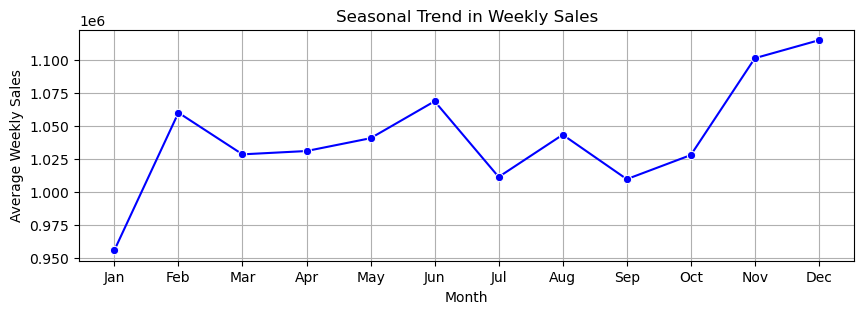

In [19]:
plt.style.use('default')

# Extract month and calculate average sales per month

seasonal_trend = df_copy.groupby("Month")["Weekly_Sales"].mean()

# Plot the seasonal trend
plt.figure(figsize=(10, 3))
sns.lineplot(x=seasonal_trend.index, y=seasonal_trend.values, marker="o", color="b")

plt.title("Seasonal Trend in Weekly Sales")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(True)
plt.show()

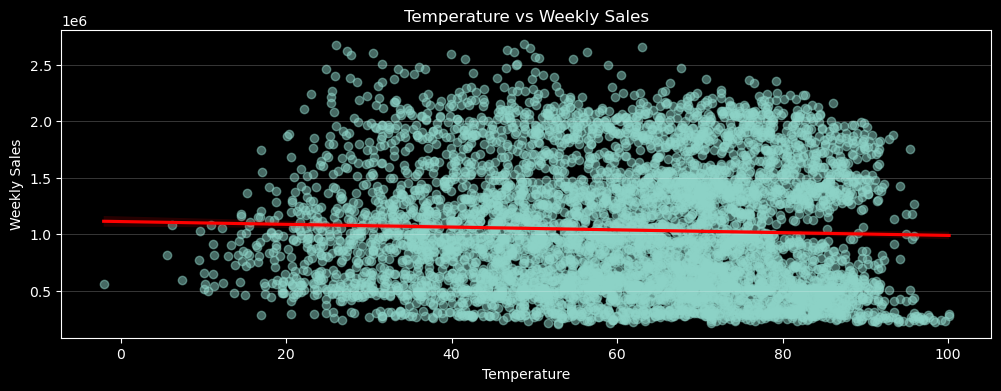

In [20]:
# Plot scatter plot with trendline (regression line)
plt.style.use('dark_background')

plt.figure(figsize=(12, 4))
sns.regplot(data=df, x="Temperature", y="Weekly_Sales", scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})

plt.title(f"Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.grid(axis="y", linestyle="-", linewidth=0.5, alpha=0.3)
plt.show()

**Does temperature affect the weekly sales in any manner?**
- The **correlation between temperature and weekly sales** is **-0.041**, which means slightly negative corelation
- As shown in above plot, **sales decrease slightly with increase in temperature**

In [21]:
# Calculate correlation between Consumer Price Index (CPI) and Weekly Sales for each store
store_cpi_correlation = df.groupby("Store")[["Weekly_Sales", "CPI"]].corr().iloc[0::2, -1].reset_index()
store_cpi_correlation.index = store_cpi_correlation.index + 1 
store_cpi_correlation = store_cpi_correlation[["Store", "CPI"]]

# Rename the correlation column for clarity
store_cpi_correlation = store_cpi_correlation.rename(columns={"CPI": "CPI_Correlation"})
store_cpi_correlation


,Store,CPI_Correlation
1,1,0.225408
2,2,-0.063786
3,3,0.317250
4,4,0.669028
5,5,0.308261
6,6,0.033524
7,7,0.289044
8,8,0.120255
9,9,0.294805
10,10,-0.130205


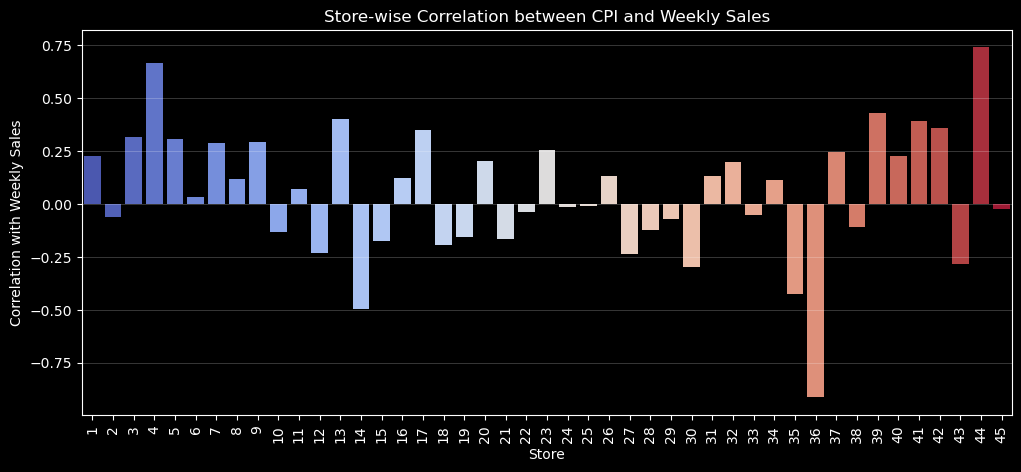

In [22]:
# Plot CPI vs Weekly Sales correlation for each store
plt.style.use('dark_background')
plt.figure(figsize=(12, 5))
sns.barplot(data=store_cpi_correlation, x="Store", y="CPI_Correlation", palette="coolwarm",hue="Store",legend=False)

plt.title("Store-wise Correlation between CPI and Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Correlation with Weekly Sales")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="-", linewidth=0.5, alpha=0.3)
plt.show()

The Consumer Price Index measures change over time in the prices paid by consumers for a representative basket of goods and services.

**How is the Consumer Price index affecting the weekly sales of various stores?**


### **Insights:**
- Some sto**) show a **strong positive correlation** with CPI, meaning **higher CPI tends to increase sales** in these stores.  
- Some sto**) have a **strong negative correlation**, indicating that **higher CPI might reduce sales** in these locations.  
- Many stores show **weak or mixed correlations**, suggesting that CPI **does not strongly affect sales everywherehts? 🚀

**Top performing stores according to the historical data.**

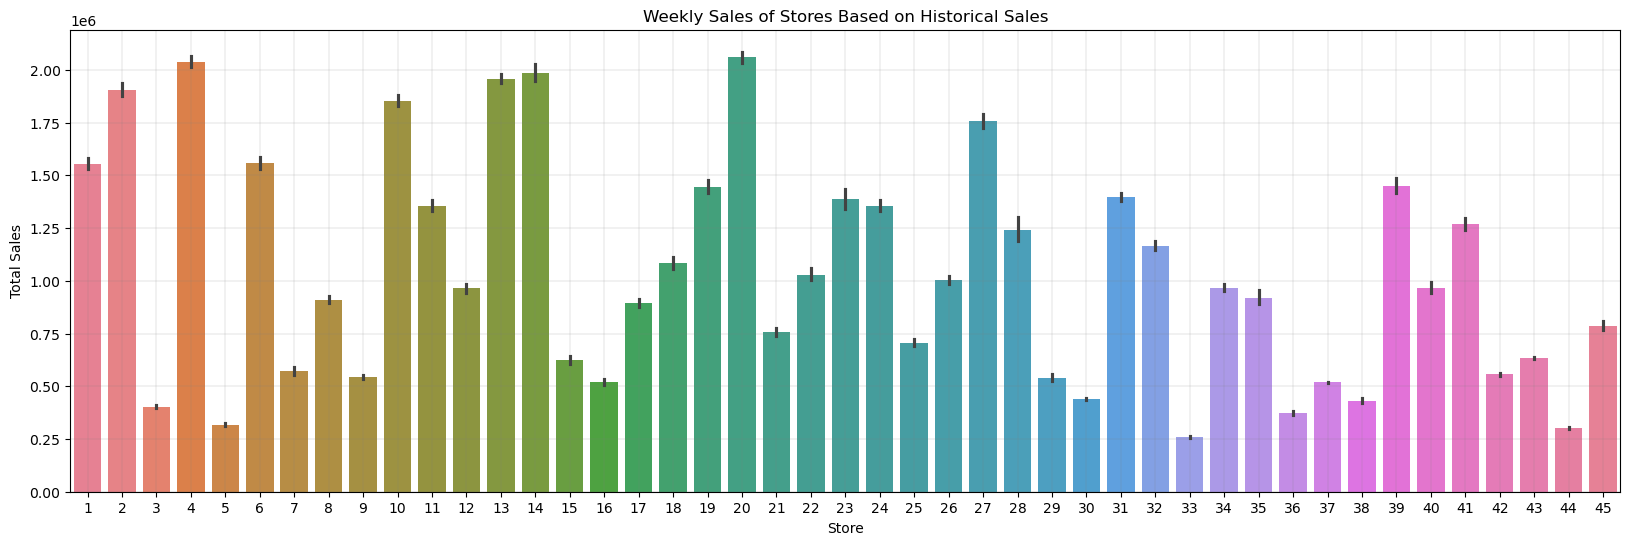

In [23]:
# Plot the top-performing stores
plt.style.use('default')
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x="Store", y="Weekly_Sales", palette = 'husl',hue = "Store", legend = False)

plt.title("Weekly Sales of Stores Based on Historical Sales")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="-", linewidth=0.3, color="grey", alpha=0.5)  # Less visible grid
plt.show()

In [24]:
# Find top-performing stores based on historical total sales
top_stores = df.groupby("Store")["Weekly_Sales"].sum().reset_index()

# Sort stores by total sales in descending order
top_stores = top_stores.sort_values(by="Weekly_Sales", ascending=False).head(10)  # Top 10 stores
pd.options.display.float_format = '{:.2f}'.format
top_stores

,Store,Weekly_Sales
19,20,280023734.81
13,14,276127584.78
1,2,268722063.50
12,13,268202470.39
9,10,255678877.44
26,27,248038735.05
3,4,244648709.65
0,1,222402808.85
5,6,221028555.46
38,39,207445542.47


**The worst performing store, and how significant is the difference between the
highest and lowest performing stores**.

In [25]:
# Find the worst-performing store based on historical total sales
worst_store = df.groupby("Store")["Weekly_Sales"].sum().reset_index()

# Sort to get the lowest performing store
worst_store = worst_store.sort_values(by="Weekly_Sales", ascending=True).head(1)  # Worst store
worst_store

,Store,Weekly_Sales
37,38,7347378.89


In [26]:
# best-performing store
best_store = top_stores.head(1)
best_store

,Store,Weekly_Sales
19,20,280023734.81


In [27]:
# Calculate the difference between best and worst performing stores
sales_difference = best_store["Weekly_Sales"].values[0] - worst_store["Weekly_Sales"].values[0]
sales_difference

272676355.92

## **Create a copy of dataset to work for forcasting**

In [28]:
df1 = df
df1.set_index('Date', inplace=True)
df1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Date,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
2010-12-02,1,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
2010-05-03,1,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,4.00,192.01,8.68,2012,9
2012-05-10,45,733455.07,0,64.89,3.98,192.17,8.67,2012,5
2012-12-10,45,734464.36,0,54.47,4.00,192.33,8.67,2012,12


**Choosing a  single store from the given stores for its weekly sales forecasting**

In [95]:
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45bb
a= int(input("Enter the store id:"))

Enter the store id: 1


In [96]:
store = df1[df1.Store == a]
store

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Date,,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.57,211.10,8.11,2010,5
2010-12-02,1,1641957.44,1,38.51,2.55,211.24,8.11,2010,12
2010-02-19,1,1611968.17,0,39.93,2.51,211.29,8.11,2010,2
2010-02-26,1,1409727.59,0,46.63,2.56,211.32,8.11,2010,2
2010-05-03,1,1554806.68,0,46.50,2.62,211.35,8.11,2010,5
...,...,...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.67,222.98,6.91,2012,9
2012-05-10,1,1670785.97,0,68.55,3.62,223.18,6.57,2012,5
2012-12-10,1,1573072.81,0,62.99,3.60,223.38,6.57,2012,12


**Time series problems are univarirate, so we will choose the column with respect of which we want to forecast weekly sales ( in this case - Dates)**

In [97]:
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.head(10)

,Weekly_Sales
Date,
2010-01-10,1453329.50
2010-02-04,1594968.28
2010-02-07,1492418.14
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-09,1540163.53
2010-03-12,1548033.78
2010-03-19,1472515.79
2010-03-26,1404429.92


In [98]:
sales.dtypes

Weekly_Sales    float64
dtype: object

In [99]:
a = sales.shape
print(f"Rows: {a[0]} & Columns: {a[1]}")

Rows: 143 & Columns: 1


In [100]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-01-10 to 2012-12-10
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


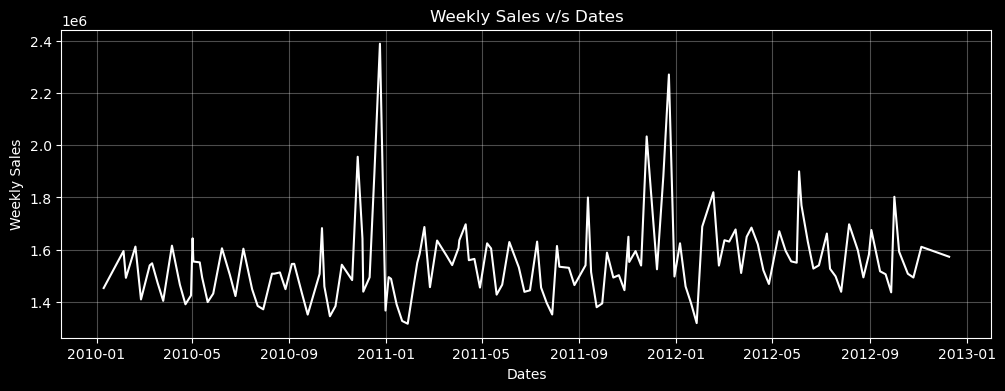

In [101]:
plt.style.use('dark_background')
plt.figure(figsize=(12,4))
plt.plot(sales,color='w')
plt.xlabel('Dates')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales v/s Dates')
plt.grid(True,alpha=0.3)

### **Check For Stationarity**
- we need to ensure that the mean and variance are constant

### **ADFuller - Augmented Dickey Fuller Test**
  * **This is a tool for checking stationarity statistically**
  * **What's the condition of stationarity**
    * **If the p-value is low (< 0.05) -> Stationary**
    * **If the p-value is high (> 0.05) -> Non- Stationary**

<Figure size 640x480 with 0 Axes>

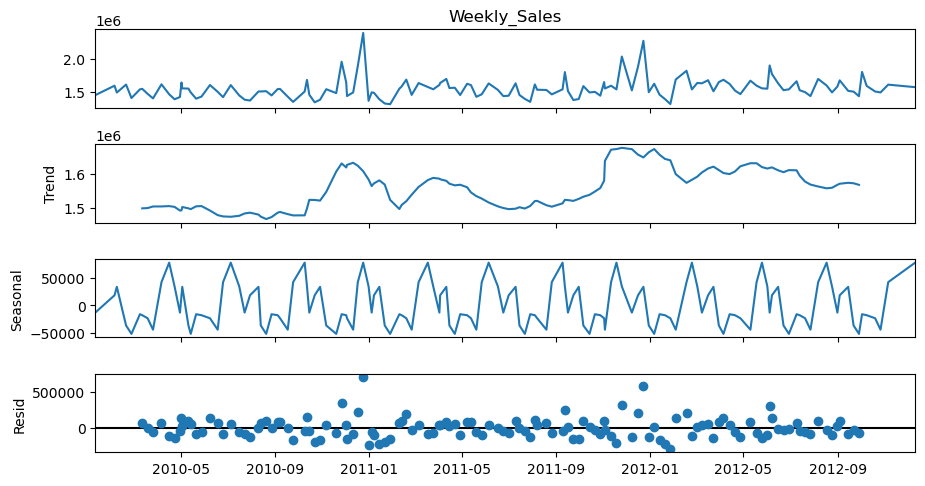

In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales['Weekly_Sales'], period=12) 

plt.style.use('default')

fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(10, 5)
plt.show()

seasonal decomposition plot shows:

1. **Observed**: The original weekly sales data with fluctuations.
2. **Trend**: A clear upward trend initially, followed by a slight decline.
3. **Seasonal**: A repeating pattern (suggesting seasonality).
4. **Residuals**: Some variation remains, but they seem randomly scattered.

### **What This Means for ARIMA:**
- **Seasonality is present** (weekly fluctuations). This suggests **SARIMA** (seasonal ARIMA) might be a better choice instead of plain ARIMA.
- **Trend is non-stationary** (it goes up and down). You might need **first-order differencing** (`d=1`).
- **Residuals appear somewhat random**, meaning a good model should capture most(p,d,q)` and `(P,D,Q,S)` values? 🚀

In [103]:
def helper(data):
  # Rolling Mean
  rolling_mean = data.rolling(window = 12).mean()
  # Rolling Std Dev (1 year timeframe)
  rolling_std = data.rolling(window = 12).std()
  plt.style.use('dark_background')
  plt.figure(figsize=(12,4))

  original_data = plt.plot(data, color = "red", label = "Original Data")
  mean_data = plt.plot(rolling_mean, color = "yellow", label = "Rolling Mean")
  std_data = plt.plot(rolling_std, color = "blue", label = "Rolling Std")
  plt.legend()
  plt.show()

  results = adfuller(data)
  if results[1] > 0.05:
    print(f"Non Stationary, P-value: {results[1]}")
  else:
    print(f"Stationary, P-value: {results[1]}")

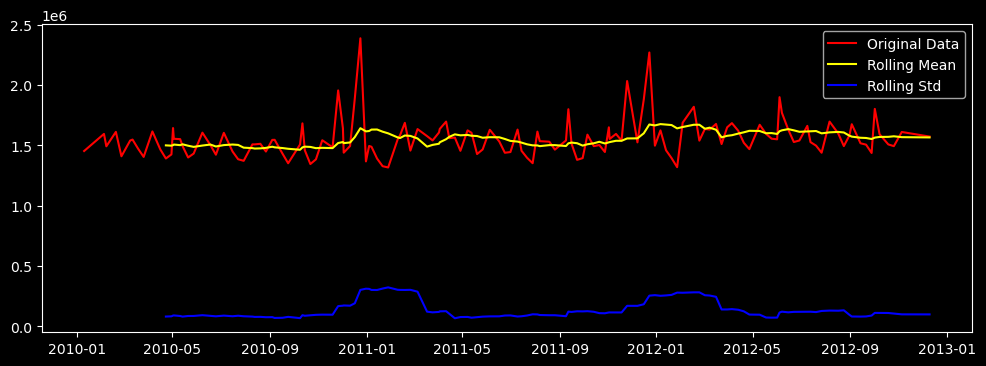

Stationary, P-value: 1.9818882304154748e-16


In [104]:
helper(sales)

## **Order of the model**

#### **Auto Correlation Function (ACF)**
  * **This measure the correlation between a time series (Current) with the previous timestamps**

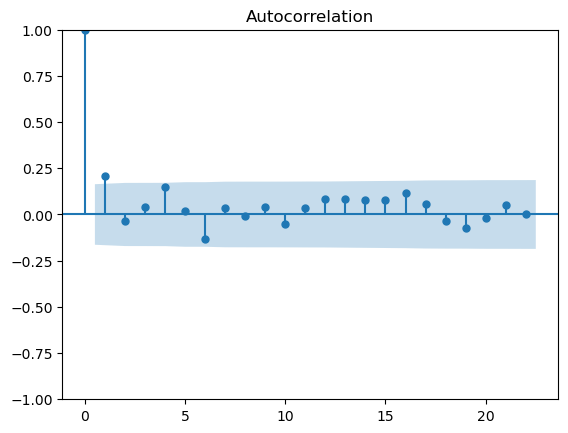

In [109]:
plot_acf(sales)
plt.show()
plt.close()

#### **Partial Auto Correlation Function (ACF)**
  * **one to one correlation by ignoring the in-between data**

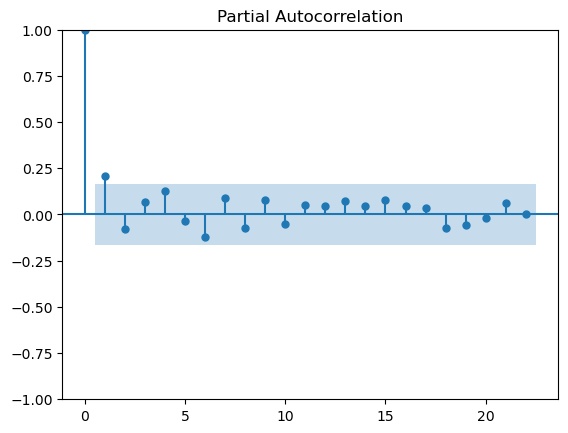

In [110]:
plot_pacf(sales)
plt.show()
plt.close()

## **Model Building**

In [113]:
model = ARIMA(sales,order = (1,1,1))

In [114]:
results = model.fit()

In [115]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1913.838
Date:                Fri, 21 Feb 2025   AIC                           3833.676
Time:                        11:16:03   BIC                           3842.543
Sample:                             0   HQIC                          3837.279
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3516      0.057      6.210      0.000       0.241       0.463
ma.L1         -0.9454      0.032    -29.729      0.000      -1.008      -0.883
sigma2      2.706e+10   2.09e-13   1.29e+23      0.0

In [117]:
errors = sum((results.fittedvalues - sales["Weekly_Sales"])**2)
errors

6418866488380.693

In [50]:
import pmdarima as pm
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split

In [118]:
arima_model = auto_arima(
    sales, # data
    test = "adf", # test we are considering
    start_p = 0,
    start_q = 0,
    seasonal = True,
    max_p = 13,
    max_q = 13,
    stepwise = True,
    trace = True,
    suppress_warnings = True,
    error_action = "ignore"
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3828.654, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3824.358, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3823.563, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4486.784, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3826.099, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=3825.572, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3827.490, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4388.259, Time=0.04 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.300 seconds


In [119]:
main_model = ARIMA(sales, order = (0,0,1)) 
# the zeroes at the end are seasonal part of arima
main_result = main_model.fit()

In [120]:
main_errors = sum((main_result.fittedvalues - sales["Weekly_Sales"] )**2)

In [121]:
main_errors

3284656802261.2227

In [122]:
print(main_result.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1908.745
Date:                Fri, 21 Feb 2025   AIC                           3823.489
Time:                        11:16:40   BIC                           3832.378
Sample:                             0   HQIC                          3827.101
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.555e+06   1.75e+04     88.749      0.000    1.52e+06    1.59e+06
ma.L1          0.2350      0.052      4.538      0.000       0.133       0.336
sigma2      2.341e+10      0.104   2.25e+11      0.0

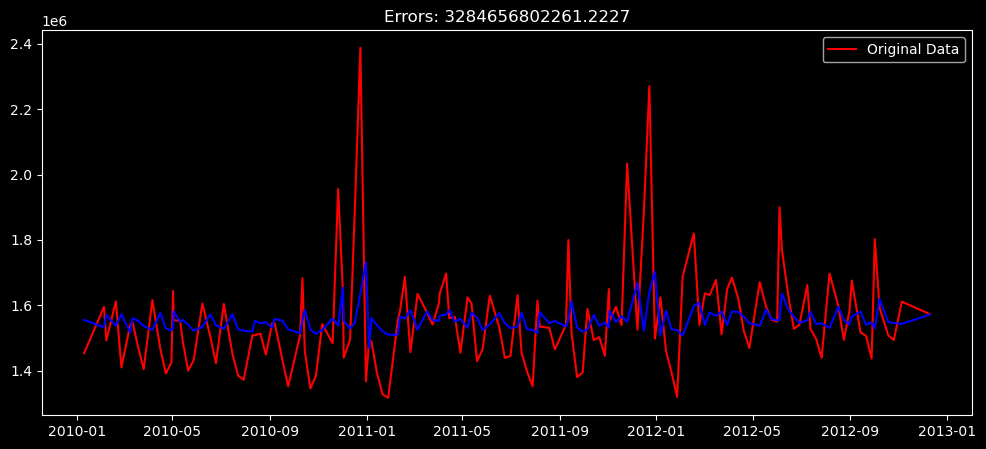

In [168]:
plt.figure(figsize=(12,5))
plt.style.use('dark_background')
plt.plot(sales, label = "Original Data", color = "red")
plt.plot(main_result.fittedvalues, color = "blue")
plt.title(f"Errors: {main_errors}")
plt.legend()
plt.show()

In [125]:
# the reason pred data is falling is -
# - in the model the seasonality is there so this can be a reason
# - not stationary
# - too small data

# maybe we can use sarimax

In [126]:
# Define the parameters p,d,q (assumers range)
p = d = q = range(0,2)

# Genrate all possible combinations of the triplets
pdq = list(itertools.product(p, d, q))

In [127]:
len(pdq)

8

In [128]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [129]:
seasonal_pdq # 12 is the window size, that is seasonality
# the formate is (p,d,q,s)

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
# Metrics for evaluation
best_aic = float('inf')   # fi you take a higher value, any lower number will be accomadate

best_order = None

best_seasonal_order = None

In [132]:
# running the model
for x in pdq:
  for y in seasonal_pdq:
    try:
      model = SARIMAX(sales,        # data
                      order = x,           # normal order (pdq)
                      seasonal_order = y)  # seasonal order
      results = model.fit()                # Fitting the data into the model

      if results.aic < best_aic:  # we are comparing that if the best aic is greater than the current model's aic
        best_aic = results.aic    # IF yes, we will update the best aic with current model aic
        best_order = x
        best_seasonal_order = y
        print(f"SARIMA{x}x{y} - AIC: {results.aic}")
    except:
      continue


print(f"Best Model: SARIMA{best_order}x{best_seasonal_order}, AIC: {best_aic}")

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 4486.784293189608
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 4409.623979605267
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: 3592.835826127226
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: 3590.646886404137
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: 3585.153900756017
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 3584.925684834112
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC: 3581.647168477678
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: 3568.460868119163
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC: 3567.712116825565
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC: 3566.917966748041
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC: 3566.398045599527
Best Model: SARIMA(1, 1, 1)x(1, 1, 1, 12), AIC: 3566.398045599527


In [133]:
final_model1 = SARIMAX(sales, order = best_order, seasonal_order = best_seasonal_order)

In [134]:
results1 = final_model1.fit()

In [135]:
print(results1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1778.199
Date:                            Fri, 21 Feb 2025   AIC                           3566.398
Time:                                    11:17:42   BIC                           3580.736
Sample:                                         0   HQIC                          3572.224
                                            - 143                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2131      0.257      0.829      0.407      -0.290       0.717
ma.L1         -0.6182      0.221   

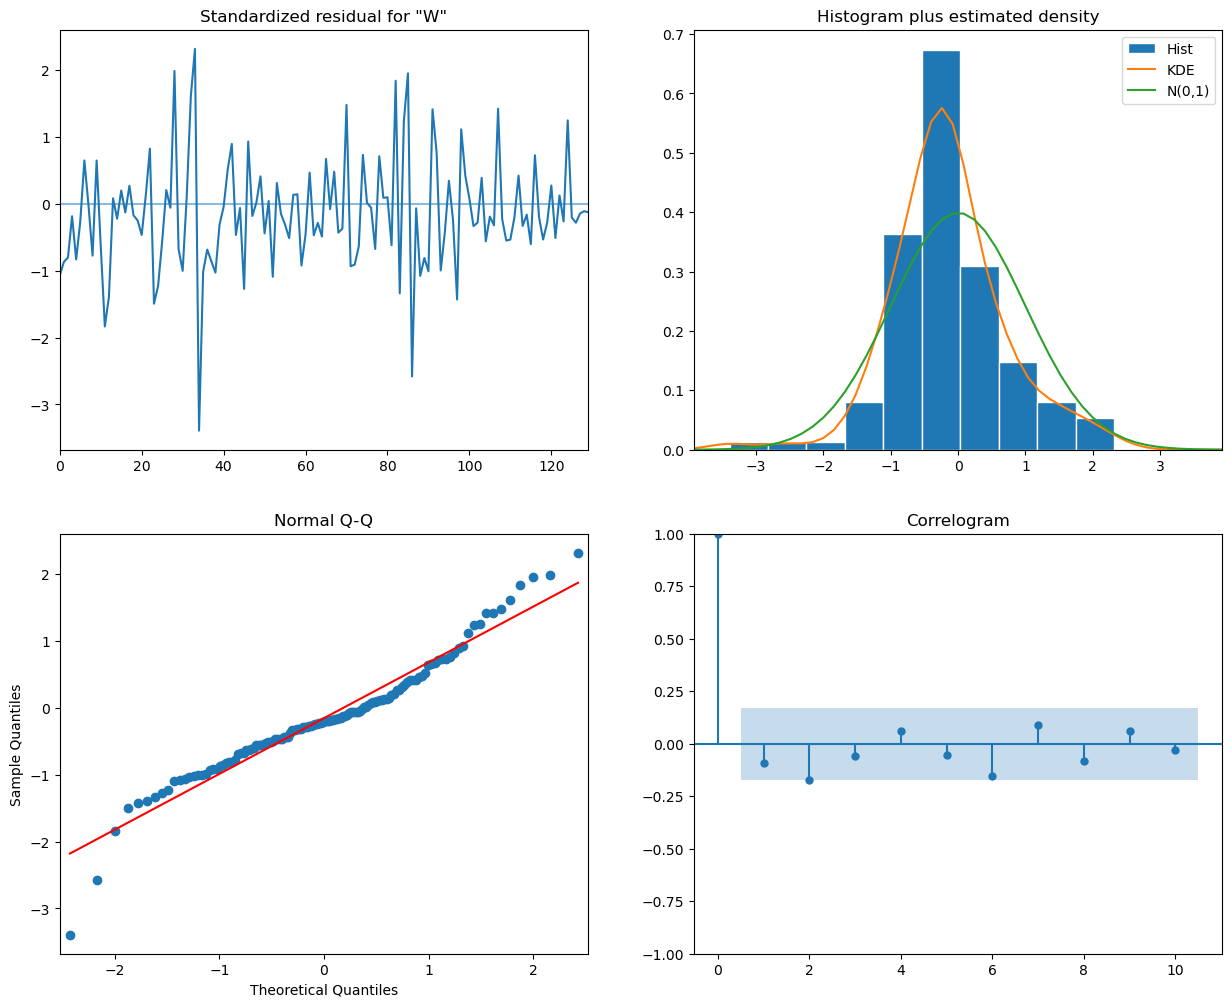

In [150]:
plt.style.use('default')
results1.plot_diagnostics(figsize=(15, 12))
plt.show()

In [161]:
forecast = results1.forecast(steps = 12)
forecast

143   1566391.91
144   1617763.34
145   1667853.99
146   1624523.93
147   1567597.09
148   1537386.24
149   1678125.78
150   1591970.71
151   1557514.27
152   1558800.88
153   1654408.47
154   1641023.22
Name: predicted_mean, dtype: float64

In [180]:
# Get last date from original sales data
last_date = sales.index[-1]

future_dates = pd.date_range(start=last_date, periods=12, freq="W")

# Create a DataFrame to store the forecast
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast.values})

# Set Date as the index
forecast_df.set_index('Date', inplace=True)
forecast_df

,Forecast
Date,
2012-12-16,1566391.91
2012-12-23,1617763.34
2012-12-30,1667853.99
2013-01-06,1624523.93
2013-01-13,1567597.09
2013-01-20,1537386.24
2013-01-27,1678125.78
2013-02-03,1591970.71
2013-02-10,1557514.27


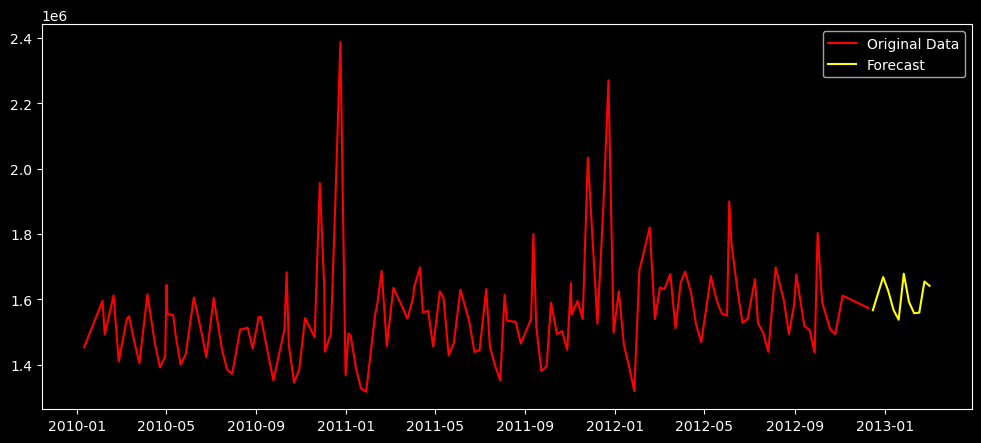

In [181]:
# Plot the original data and forecast
plt.figure(figsize=(12,5))
plt.plot(sales, color="red", label="Original Data")  # Original data
plt.plot(forecast_df, color="yellow", label="Forecast")  # Forecasted data
plt.legend()
plt.show()